In [75]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import RandomizedSearchCV

In [5]:
df = pd.read_csv('data_after_featureengg.csv')

In [13]:
X= df.drop(columns='price_$',axis=1)
y = df['price_$']

In [63]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
x_train.shape

(3207, 128)

In [49]:
x_test.shape

(802, 128)

C:\Users\Pratik\AppData\Local\Temp\ipykernel_10600\2477545984.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_train, label='Train', shade=True)
C:\Users\Pratik\AppData\Local\Temp\ipykernel_10600\2477545984.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label='Test', shade=True)


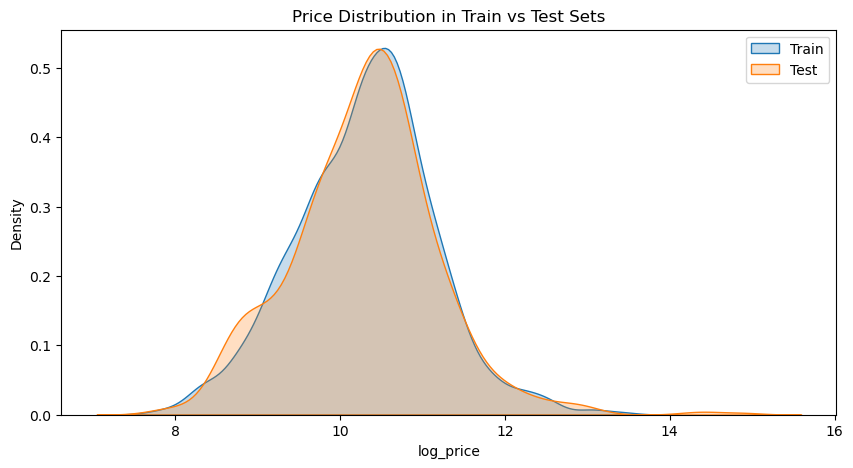

In [65]:
plt.figure(figsize=(10,5))
sns.kdeplot(y_train, label='Train', shade=True)
sns.kdeplot(y_test, label='Test', shade=True)
plt.title("Price Distribution in Train vs Test Sets")
plt.legend()
plt.show()

In [67]:
def evaluate_model(name,model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    y_pred= model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"🔸 {name}")
    print(f"  MAE:  {mae:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R²:   {r2:.4f}")
    print("-" * 40)

In [69]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}


In [71]:
for name, model in models.items():
    evaluate_model(name, model, x_train, x_test, y_train, y_test)

🔸 Linear Regression
  MAE:  0.27
  RMSE: 0.43
  R²:   0.7593
----------------------------------------
🔸 Decision Tree
  MAE:  0.33
  RMSE: 0.50
  R²:   0.6852
----------------------------------------
🔸 Random Forest
  MAE:  0.25
  RMSE: 0.39
  R²:   0.8023
----------------------------------------
🔸 XGBoost
  MAE:  0.24
  RMSE: 0.38
  R²:   0.8184
----------------------------------------


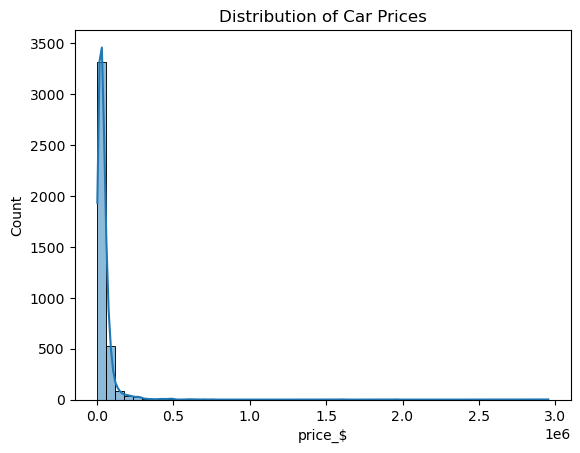

In [39]:
sns.histplot(df['price_$'], bins=50, kde=True)
plt.title("Distribution of Car Prices")
plt.show()

In [61]:
df['log_price'] = np.log1p(df['price_$'])

# Use log_price as target now
y = df['log_price']

In [77]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 4, 5, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.4],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [0.8, 1, 1.2]
}


In [79]:
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=50,  # try 50 random combinations
    cv=5,       # 5-fold cross-validation
    verbose=1,
    scoring='r2',
    n_jobs=-1,  # use all cores
    random_state=42
)


In [81]:
random_search.fit(x_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2, 0.4],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6, 8, 10],
                                        'n_estimators': [100, 200, 300, 500],
                                        'reg_alpha': [0, 0.01, 0.1],
                                        'reg_lambda': [0.8, 1, 1.2],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='r2', verbose=1)

In [83]:
print("Best R² Score:", random_search.best_score_)
print("Best Hyperparameters:\n", random_search.best_params_)


Best R² Score: 0.8785674127755996
Best Hyperparameters:
 {'subsample': 1.0, 'reg_lambda': 0.8, 'reg_alpha': 0.01, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.6}


In [87]:
best_xgb = random_search.best_estimator_

# Predict and evaluate
y_pred_log = best_xgb.predict(x_test)
mae = mean_absolute_error(y_test, y_pred_log)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_log))
r2 = r2_score(y_test, y_pred_log)

print(f"Tuned XGBoost Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

Tuned XGBoost Performance:
MAE: 0.22
RMSE: 0.37
R²: 0.8247


In [89]:
import joblib

# Save model
joblib.dump(best_xgb, 'xgb_car_price_model.pkl')

# Optional: also save your column list (needed for Streamlit input matching)
joblib.dump(X.columns.tolist(), 'feature_columns.pkl')


['feature_columns.pkl']

In [93]:
!streamlit run app.py

^C
